In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


**ilaç sınıflandırması veri seti**

bir tıp araştırmacısı olarak bir çalışma için elimizde  İlaç A, İlaç B, İlaç c, İlaç x ve y var. 200 tane de aynı hastalığa sahip bireyler bulunmaktadır . ve bu hastalar hakkında belirli verilere sahibiz. 

yapmamız gereken gelecekte aynı hastalığa sahip bir hasta için hangi ilacın daha uygun olabileceğini bulmak için bir analiz modeli geliştirmeliyiz. Veri kümemizde hastaların Yaş, Cinsiyet, Kan Basıncı ve Kolesterol değerleri bulunmaktadır 

 Bu, çok sınıflı sınıflandırıcının bir örneğidir ve veri kümesinin eğitim bölümünü bir karar ağacı oluşturmak için kullanabilir ve ardından bunu bilinmeyen bir hastanın sınıfını tahmin etmek veya yeni bir hastaya ilaç reçete etmek için kullanabiliriz.

 
kaggle linki:https://www.kaggle.com/datasets/prathamtripathi/drug-classification

In [ ]:
%matplotlib inline  
#Matplotlib Inline komutu, matplotlib tarafından oluşturulan çizimlerin ayrı bir çıktı 
#penceresinde değil, çalıştırdığımız IPython kabuğunda gösterilmesini sağlayan komuttur.
import numpy as np
#NumPy (Numerical Python), çok boyutlu dizilerle ve matrislerle çalışmamızı sağlayan 
#ve matematiksel işlemler yapabileceğimiz Python dili kütüphanelerindendir.
import pandas as pd   
#veri setinin okuma, veri ön işleme ve veri temizleme 
import matplotlib.pyplot as plt
#Matplotlib, bir görselleştirme yardımcı programı olarak hizmet veren, 
#python'da  bir grafik çizim kitaplığıdır.
import seaborn as sns
#Seaborn, Python'da istatistiksel grafikler oluşturmak için bir kütüphanedir.  Matplotlib üzerine kuruludur
#pandas veri yapılarıyla yakından bütünleşir.  
#Seaborn, verilerinizi görselleştirilmesine ve anlamanıza yardımcı olur


from sklearn.model_selection import train_test_split# veriler eğitim ve test verisi olarak ayrımamıza yarar
from sklearn.metrics  import classification_report# verileri sınıflandırmamıza yarar 
from sklearn.linear_model import LinearRegression# lineer regresyon modeli import edildi
from sklearn.metrics import accuracy_score # doğruluk skoru 
from sklearn.metrics import confusion_matrix# konfüzyon matrisine bakılacak 


#Scikit-learn, veri analiz araçlarıyla birlikte birçok danışmansız ve danışmanlı öğrenme algoritması sağlayan Python kütüphanesidir

In [ ]:
# veri setimizi pandas ile okuduk 
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drug200.csv')

**veri setinin tanınması**

In [ ]:
df.shape # verimizin kaç nitelik ve öznitelikten olustuğunu gözlemledi (200 satır ve 6 sütundan oluşuyor )

(200, 6)


*   Age : örneklemde bulunan kişilerin yaşlarını belirtir
*   sex/gender : kişilerin cinsiyet değerlerini tanımlar
*   BP (Blood Pressure Levels ): Kan basıncı düzeyini gösterir 
*   Cholesterol : kolesterol değerini gösterir 
*   Na_to_K : kişinin sodyum ve potasyum değerini gösterir
*   drug : ilaç anlamında kullanılmaktadır 


In [ ]:
df.head() # veri setinin ilk 5 satırını gösterir 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.columns # veri setinin sütun isimlerini gösterir 

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
# veri setinde bir sütun ismi değiştiriyoruz  
df.rename({"Sex": "gender"}, axis="columns", inplace=True)
df.head()

,Age,gender,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
from sklearn.preprocessing import LabelEncoder #kategorik değişkenlerin tahminde
#kullanılabilmesi için verinin türünü değiştirmeye yarar
        
le = LabelEncoder()

#aşağıda 3 sütunun değerlerini int türüne dönüştürdük
df['gender'] = le.fit_transform(df['gender'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

#df["gender"] = df["gender"].replace("F",0) diyerek de sayısallaştırma yapabiliriz


In [ ]:
df.head() # kontrol için ilk 5 satırı çağırdık 

,Age,gender,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [ ]:
# tahmin için kullanacağımız sütunun benzersiz değerlerine ulaştık 
print(pd.unique(df['Drug']))

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [ ]:
df.nunique() # bütün sütunların benzersiz değerlerini aldık

Age             57
gender           2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [ ]:
df.info() 
#Toplamda 0'dan 199'a 200 satırlık verimiz var.
# 6 sütun var.
# Null değer yok, yani her satırda veri mevcut
# Verilerin türleri yazıyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   gender       200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [ ]:
df.describe() # verilerimizin tanımlayıcı istatistiğine bakıyoruz 

,Age,gender,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485
std,16.544315,0.500854,0.821752,0.501029,7.223956
min,15.000000,0.000000,0.000000,0.000000,6.269000
25%,31.000000,0.000000,0.000000,0.000000,10.445500
50%,45.000000,1.000000,1.000000,0.000000,13.936500
75%,58.000000,1.000000,2.000000,1.000000,19.380000
max,74.000000,1.000000,2.000000,1.000000,38.247000


***veri setinin hazırlanması***

In [ ]:
# veri setinde bir sütun ismi değiştiriyoruz  
df.rename({"Sex": "gender"}, axis="columns", inplace=True)
df.head()

,Age,gender,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [ ]:
df.isna().sum() # burada ise hangi değişkenimizde kaç adert eksik değer olduğunu gösterdik

Age            0
gender         0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df['Drug'].value_counts()
# burada Drug değişkenimizin dengeli dağılıp dağılmadığını kontrol ettik

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

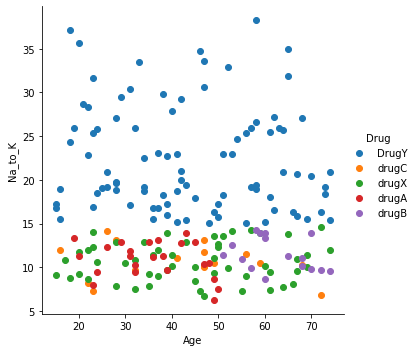

In [ ]:
sns.FacetGrid(df,hue='Drug',height=5)\ 
.map(plt.scatter,'Age','Na_to_K')\
.add_legend()

# bu veri görselleştirmesinde drug sütunun yaş ve potasyum ve sodyum değerleri ile ilişkisi incelenmiştir 
# kullanılan grafik seaborn kütüphanesinin saçılım grafiğidir 
# benzersiz ilaç değerlerinin yaş ve potasyum ve sodyum değerleri altında dağılımı renklendirilerek gösterilmiştir 

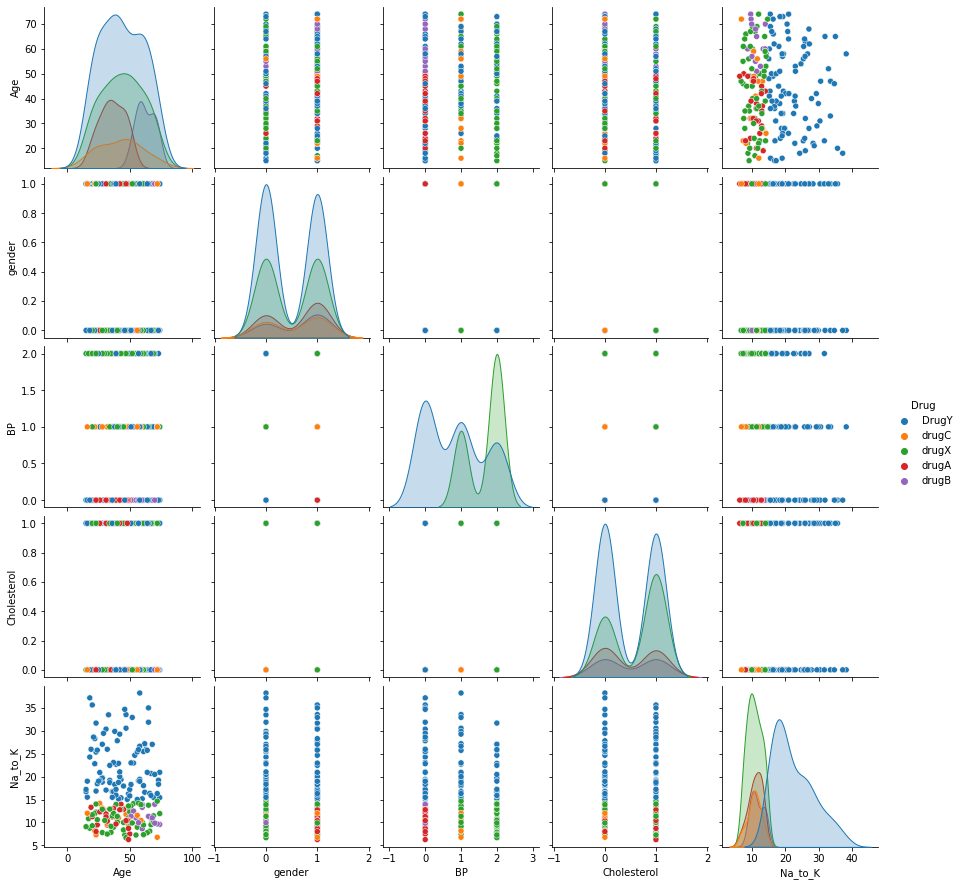

In [ ]:
#veri seti içindeki tüm değişkenlerin birbirleri ile olan ilişkilerini gösteren grafikler verir
sns.pairplot(df,hue='Drug')

yukarıda bağımsız değişkenlerimiz olan sodyum_poatasyum oranı ve yaş değişkenlerini içeren grafikler görünmektedir bu grafiklere göre 
1. ilaç A,B,X,C ilaçları genel anlamda potasyum değerleri düşük(5-15) olan hastalar üzerinde kullanılmaktadır 
2. y ilacı ise potasyum değeri 15-35 aralığında olan hastaların tedavisinde kullanılmaktadır
3. çok fazla grafiğin olmamasının sebebi nümerik değerlerin az olması sebebiyledir 

In [ ]:
X = df.iloc[:, :-1].values    # x değerine ilk 5 sütun değerini atadık
y = df.iloc[:, -1].values    # y değişkenine son sütun değerini atadık 
print(X)             #  print diyerek atadığımız değerleri yazdırdık 
print(y)
X.shape   # atadığımız değerlerin boyutlarını öğrendik 
y.shape

#elimizde olan x verileri ile mevcut modelimizi eğiteceğiz 
#elimizde olan y verisi ile de modelimizi tahmin için kullanacağız 

[[23.     0.     0.     0.    25.355]
 [47.     1.     1.     0.    13.093]
 [47.     1.     1.     0.    10.114]
 [28.     0.     2.     0.     7.798]
 [61.     0.     1.     0.    18.043]
 [22.     0.     2.     0.     8.607]
 [49.     0.     2.     0.    16.275]
 [41.     1.     1.     0.    11.037]
 [60.     1.     2.     0.    15.171]
 [43.     1.     1.     1.    19.368]
 [47.     0.     1.     0.    11.767]
 [34.     0.     0.     1.    19.199]
 [43.     1.     1.     0.    15.376]
 [74.     0.     1.     0.    20.942]
 [50.     0.     2.     0.    12.703]
 [16.     0.     0.     1.    15.516]
 [69.     1.     1.     1.    11.455]
 [43.     1.     0.     0.    13.972]
 [23.     1.     1.     0.     7.298]
 [32.     0.     0.     1.    25.974]
 [57.     1.     1.     1.    19.128]
 [63.     1.     2.     0.    25.917]
 [47.     1.     1.     1.    30.568]
 [48.     0.     1.     0.    15.036]
 [33.     0.     1.     0.    33.486]
 [28.     0.     0.     1.    18.809]
 [31.     1.

(200,)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0) 
#veri setimizi %30 test olmak üzere test ve eğitim verisi olarak ayırdık 
 # random_state tekrar üretilebilirlik için çalıştırmalar arasında tutarlı olmalıdır

In [ ]:
#eğitim ve test verisi olarak ayırmış olduğumuz verilerin boyutlarını öğrendik 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(80, 5)
(120,)
(80,)


**modellerin kullanılması**

**lineer regresyon**


Linear Regression: Sayısal girdi ve çıktılar arasındaki doğrusal ilişkiyi tespit etmeyi sağlar. Düzlemde yayılmış verinin modelini en iyi biçimde doğrusal olarak çıkartmaya çalışan yöntemdir



*   Sürekli değişken(ler)e dayalı olarak gerçek değerlerin (konut maliyeti, arama sayısı, toplam satışlar vb.) tahmin edilmesinde kullanılır. Burada, bağımsız ve bağımlı değişkenler arasında en iyi çizgiyi uydurarak ilişki kurulmaktadır. Bu en uygun çizgi, regresyon çizgisi olarak bilinir ve bir doğrusal denklem Y= a X + b ile temsil edilir.



In [ ]:
XL = df.iloc[:, :-1].values    #   X -> Feature Variables\n",
yL = df.iloc[:, -1].values #   y ->  Target\n",
        
from sklearn.preprocessing import LabelEncoder # kategorik verilerin sayısallaştırmamıza yarayan kütüphane import edildi 
        
le = LabelEncoder() #encoder modülü çağrıldı 
YL = le.fit_transform(yL) # dönüştürülen veriler YL adlı değişkene atandı 
        
print(y)  # kategorik veri
print(YL) # sayısal veri

['DrugY' 'drugC' 'drugC' 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugC' 'DrugY'
 'DrugY' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'drugX' 'drugA'
 'drugC' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugB' 'drugX' 'DrugY' 'drugX' 'drugX'
 'drugA' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugX' 'drugX'
 'drugX' 'drugA' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY'
 'drugB' 'drugC' 'drugB' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY'
 'drugX' 'drugB' 'DrugY' 'drugA' 'drugX' 'DrugY' 'DrugY' 'drugB' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'drugA' 'drugX' 'drugB'
 'drugX' 'drugC' 'drugA' 'drugC' 'drugB' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'drugA' 'drugA' 'drugC' 'drugX' 'DrugY' 'drugX' 'drugX' 'DrugY'
 'drugB' 'DrugY' 'drugA' 'drugX' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugX'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'D

In [ ]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(XL, YL, test_size = 0.1, random_state =0) 

In [ ]:
print(X_trainL.shape)
print(y_trainL.shape)

(180, 5)
(180,)


In [ ]:
from sklearn.linear_model import LinearRegression
        
        # Örnek Model
modelLR = LinearRegression()
        
        # Modeli eğitim verilerine uydurma
modelLR.fit(X_trainL, y_trainL)
        
        # Test verisinde tahmin 
Y_pred = modelLR.predict(X_testL)

In [ ]:
df_preds = pd.DataFrame({'Actual': y_testL, 'Predicted': Y_pred})
print(df_preds)

    Actual  Predicted
0        3   2.789988
1        4   2.796142
2        0   0.831762
3        0  -2.043363
4        0   1.702389
5        4   2.529789
6        4   3.454250
7        4   2.488314
8        0   1.549649
9        4   3.810959
10       1   2.006498
11       0  -0.404118
12       0   0.084808
13       0   1.614746
14       2   1.057145
15       3   2.220014
16       0  -1.296284
17       0   1.638605
18       4   2.046728
19       0   0.834898


In [ ]:
df.head()

,Age,gender,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [ ]:
from sklearn import metrics
        #𝑥₁ ve 𝑥₂ olmak üzere iki bağımsız değişken varsa, regresyon fonksiyonu 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂.\n",
        #𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 
        #5 tane temel bağımsız değişkenden oluşmaktadır bunlar (age,gender,cholesterol,Na_to_k,BP)
print('y-intercept             :' , modelLR.intercept_) #b0\n",
print('beta coefficients       :' , modelLR.coef_) #b1, b2,...\n",
print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_testL,Y_pred))
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_testL,Y_pred))
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_testL,Y_pred)))




y-intercept             : 3.328216938528489
beta coefficients       : [ 4.72538417e-04 -1.43620808e-01  7.23636156e-01  2.76488619e-01
 -1.54715301e-01]
Mean Abs Error MAE      : 1.090689515804878
Mean Sqrt Error MSE     : 1.5303190339324015
Root Mean Sqrt Error RMSE: 1.2370606427869255


doğrusal regresyonun amacı ,tüm veri noktalarının tahmin hatasını en aza indiren bir çizgi bulmaktır 
* regresyon analizinde modelin performansını değerlendirmek için 
1. ortalama karesel hata 
2.  ortalama mutlak hata 
3. kök ortalama karesel hata 


belirleme katsayısı metrikleri kullanılır

**MAE (Means absolute error) ortalama mutlak hata**


veri kümesindeki gerçek ve tahmin edilen mutlak farkın ortalamasını temsil eder. veri setindeki artıkların ortalamasını ölçer


**MSE (Mean squared Error) ortalama karesel hata**

veri setindeki orjinal ve tahmin edilen değerler arasındaki farkın karesinin ortalamasını temsil eder kalıntıların varyansını ölçer

**RMSE (Root mean Squared Error) kök ortalama kare hatası**

ortalama kare hatasının kareköküdür. kalıntıların standart sapmasını ölçer




 **60-40**
1. y-intercept             : 3.3436928946569626
2. beta coefficients       : [ 0.00246981 -0.0510324   0.82657897  0.2402869  -0.17043411]
3. Mean Abs Error MAE      : 1.0690283910531497
4. Mean Sqrt Error MSE     : 1.6540644404165579
5. Root Mean Sqrt Error RMSE: 1.2861043660669838

**70-30**

1. y-intercept             : 3.150162387182345
2. beta coefficients       : [ 0.00562831 -0.22593053  0.80032138  0.26717183 -0.15812123]
3. Mean Abs Error MAE      : 1.0521109443361558
4. Mean Sqrt Error MSE     : 1.5808576488591857
5. Root Mean Sqrt Error RMSE: 1.2573216171128156

**80-20**

1. y-intercept             : 3.278140061854006
2. beta coefficients       : [ 0.00212077 -0.22286634  0.72925156  0.23848894 -0.15160124]
3. Mean Abs Error MAE      : 1.0503518344662983
4. Mean Sqrt Error MSE     : 1.489931280286363
5. Root Mean Sqrt Error RMSE: 1.2206274125573138

**90-10**

1. y-intercept             : 3.328216938528489
2. beta coefficients       : [ 4.72538417e-04 -1.43620808e-01  7.23636156e-01  2.76488619e-01
 -1.54715301e-01]
3. Mean Abs Error MAE      : 1.090689515804878
4. Mean Sqrt Error MSE     : 1.5303190339324015
5. Root Mean Sqrt Error RMSE: 1.2370606427869255

-------------------------------------------------------------------------------------------------------------

**3.2 K-En Yakın Komşuluk (K-NN)**

K en yakın komşuluk yöntemi, test örneklerini k komşusunun çoğunluk oyu ile sınıflandıran basit bir algoritmadır.

**K parametresinin seçimi:** Az sayıda komşu olması durumunda, gürültünün sonuç üzerinde daha büyük bir etkisi olacaktır ve çok sayıda komşu, onu hesaplama açısından pahalı hale getirir.

Genel olarak, Veri bilimcileri sınıf sayısı çift ise tek sayı olarak seçerler. Modeli farklı k değerleri üzerinde oluşturarak da kontrol edebilir ve performanslarını kontrol edebilirsiniz.




*   5 için doğruluk değeri : 0,65
*   7 için doğruluk değeri : 0,65
*   9 için doğruluk değeri : 0,68





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Model = KNeighborsClassifier(n_neighbors=3)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

#kullanmış olduğumuz modelin kalitesini ölmek için kullandığımız ölçüm metrikleri 
print(classification_report(y_test, y_pred))#kullanmış olduğumuz modelin kalitesini ölmek için kullandığımız ölçüm metrikleri 
print(confusion_matrix(y_test, y_pred))  # confusion matrix değeri verir (örnek: 39 drug y den 2 tanesi false olmuş )
print('doğruluk',accuracy_score(y_pred,y_test))#Doğru tahminlerin yüzdesi 



              precision    recall  f1-score   support

       DrugY       0.93      0.95      0.94        39
       drugA       0.46      0.75      0.57         8
       drugB       0.36      1.00      0.53         4
       drugC       0.00      0.00      0.00         4
       drugX       0.71      0.40      0.51        25

    accuracy                           0.71        80
   macro avg       0.49      0.62      0.51        80
weighted avg       0.74      0.71      0.70        80

[[37  0  2  0  0]
 [ 0  6  0  1  1]
 [ 0  0  4  0  0]
 [ 0  1  0  0  3]
 [ 3  6  5  1 10]]
doğruluk 0.7125


1. **precision**
2. **recall**
3. **f1-score** 
*  tanımları aşağıda açıklanmıştır 






In [ ]:
#Kesinlik – Tahminlerinizin yüzde kaçı doğru çıktı?

#Kesinlik, bir sınıflandırıcının, aslında negatif olan bir örneği pozitif olarak etiketlememe yeteneğidir. 
#Her sınıf için, gerçek pozitiflerin doğru ve yanlış pozitiflerin toplamına oranı olarak tanımlanır.

#TP – Gerçek Pozitifler 
#FP – Yanlış Pozitifler 

 #Kesinlik – Pozitif tahminlerin doğruluğu. 
  #Kesinlik = TP/(TP + FP) 
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,y_pred,average=None)))

Precision score: [0.925      0.46153846 0.36363636 0.         0.71428571]


In [ ]:
#Toplam gerçek pozitiflere göre pozitif tahminleri düzeltin

#Bu şu şekilde hesaplanır:

 #   Hatırlama = Gerçek Pozitifler / (Gerçek Pozitifler + Yanlış Negatifler)

#oluşturabiliriz Kesinliği görselleştirmek ve belirli bir modeli geri çağırmak için bir kesinlik-geri çağırma eğrisi .
# Bu eğri, farklı eşikler için kesinlik ve geri çağırma arasındaki değiş tokuşu gösterir. 
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_test,y_pred,average=None)))

Recall score: [0.94871795 0.75       1.         0.         0.4       ]


In [ ]:
#F1 puanı – Olumlu tahminlerin yüzde kaçı doğru çıktı? 

#F  1  puanı, hassaslığın ağırlıklı harmonik ortalamasıdır ve en iyi puan 1,0 ve en kötü puan 0,0 olacak şekilde hatırlayın. 
#  Genel olarak konuşursak, F  1  puanları, kesinliği ve hatırlamayı hesaplamalarına dahil ettikleri için doğruluk ölçütlerinden daha düşüktür.  
# Pratik bir kural olarak, sınıflandırıcı modellerini karşılaştırmak için genel doğruluk yerine F  1'in  ağırlıklı ortalaması kullanılmalıdır. 

#F1 Puanı = 2*(Geri Çağırma * Kesinlik) / (Geri Çağırma + Kesinlik) 
from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_test,y_pred,average=None)))

F1 Score: [0.93670886 0.57142857 0.53333333 0.         0.51282051]


**Decision Tree**

**Decision tree (karar ağacı)**
Karar ağacı algoritması, veri madenciliği sınıflandırma algoritmalarından biridir. Önceden tanımlanmış bir hedef değişkene sahiplerdir. Yapıları itibariyle en tepeden en aşağı inen bir strateji sunmaktadırlar 
Bir karar ağacı, çok sayıda kayıt içeren bir veri kümesini, bir dizi karar kuralları uygulayarak daha küçük kümelere bölmek için kullanılan bir yapıdır. Yani basit karar verme adımları uygulanarak, büyük miktarlardaki kayıtları, çok küçük kayıt gruplarına bölerek kullanılan bir yapıdır.

**Karar Ağacı Performansını Optimize Etme**

**criterion:** isteğe bağlı (default=”gini”) veya Nitelik seçim ölçüsü seç : Bu parametre, farklı-farklı nitelik seçim ölçüsünü kullanmamızı sağlar. Desteklenen kriterler, Gini indeksi için "gini" ve bilgi kazanımı için "entropi" dir.

*Model = DecisionTreeClassifier(criterion="entropy")*

**max_depth:** int veya None, isteğe bağlı (default=None) veya Maksimum Ağaç Derinliği : Ağacın maksimum derinliği. None ise, tüm yapraklar min_samples_split örneklerinden daha azını içerene kadar düğümler genişletilir. Maksimum derinliğin daha yüksek değeri fazla uydurmaya (overfitting), daha düşük bir değer ise yetersiz uydurmaya (underfitting) neden olur .

*Model = DecisionTreeClassifier(criterion="entropy",max_depth=3)*



* 2 için doğruluk değeri : 0,8875
* 3 için doğruluk değeri : 0,86,25
* 4 için doğruluk değeri : 0,9875
* 5 için doğruluk değeri : 0,9875
* 6 için doğruluk değeri : 0,9875

              precision    recall  f1-score   support

       DrugY       0.97      1.00      0.99        39
       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.96      0.98        25

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

[[39  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 24]]
doğruluk 0.9875


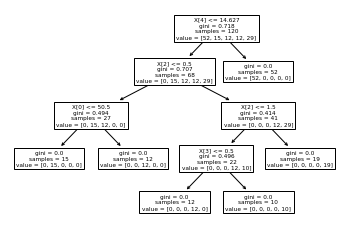

In [ ]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier #karar ağacı kütüphanesi import edildi 
from sklearn import tree
        
Model = DecisionTreeClassifier(max_depth=6) # optimal derinlik verildi 
        
Model.fit(X_train, y_train) #model eğitildi 
        
y_pred = Model.predict(X_test)
        
tree.plot_tree(Model)
        
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
        
        # Doğruluk skoru
print('doğruluk',accuracy_score(y_pred,y_test))




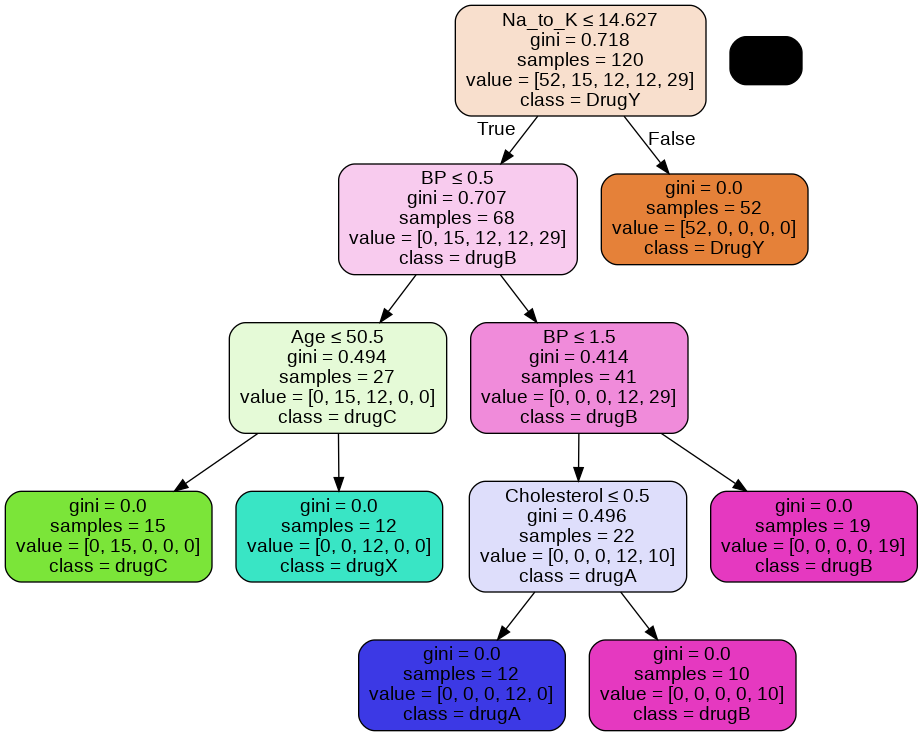

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(Model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =['Age', 'gender', 'BP', 'Cholesterol', 'Na_to_K'],class_names=['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Drug.png')
Image(graph.create_png())
#gini değeri derste verilen karar ağaçlarını sunumuna bakmalısın 

**karar ağacı yorumlanması**

yukarıda görseli verilen graf da kök değerimizi Na_to_K sütunu oluşturmaktadır Na_to_K değerini root(kök) olarak seçmemizin nedeni veri kümemizi uygun koşullara göre küçük alt veri gruplarına bölme yeteneğidir. bölme yeteneğini ölçmemize yarayan hesaplama formüllerimiz yer almaktadır bunlar gini değeri, entropy ve gain ratio  olarak karşımıza çıkmaktadır entropy ve gini değerlerinin hesaplamaları birbirine benzerlik göstermektedir.

bu ölçüm değerlerinden en yüksek olan root olarak ağacı başlatır ve derecelerine göre ağacın dalları şekillenmeye devam eder 



In [ ]:
df_preds=pd.DataFrame({'Gercek': y_test, 'Tahmin':y_pred})
df_preds

,Gercek,Tahmin
0,drugC,drugC
1,drugX,drugX
2,DrugY,DrugY
3,DrugY,DrugY
4,DrugY,DrugY
...,...,...
75,DrugY,DrugY
76,DrugY,DrugY
77,drugX,drugX
78,drugX,drugX


**Naive Bayes Classifier**

Naive Bayes sınıflandırıcısının temeli Bayes teoremine dayanır. lazy ( tembel ) bir öğrenme algoritmasıdır aynı zamanda dengesiz veri kümelerinde de çalışabilir. Algoritmanın çalışma şekli bir eleman için her durumun olasılığını hesaplar ve olasılık değeri en yüksek olana göre sınıflandırır. Az bir eğitim verisiyle çok başarılı işler çıkartabilir.

In [ ]:
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)
            
y_pred = Model.predict(X_test)
            
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
            # Doğruluk skoru
print('doğruluk',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       DrugY       0.94      0.87      0.91        39
       drugA       0.80      1.00      0.89         8
       drugB       0.80      1.00      0.89         4
       drugC       0.67      1.00      0.80         4
       drugX       1.00      0.92      0.96        25

    accuracy                           0.91        80
   macro avg       0.84      0.96      0.89        80
weighted avg       0.93      0.91      0.91        80

[[34  2  1  2  0]
 [ 0  8  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 23]]
doğruluk 0.9125


In [ ]:
df_preds=pd.DataFrame({'Gercek': y_test, 'Tahmin':y_pred})
df_preds

,Gercek,Tahmin
0,drugC,drugC
1,drugX,drugX
2,DrugY,DrugY
3,DrugY,DrugY
4,DrugY,DrugY
...,...,...
75,DrugY,DrugY
76,DrugY,DrugY
77,drugX,drugX
78,drugX,drugX


**Destek Vektör Makineleri (Support Vector Machine)**

 genellikle sınıflandırma problemlerinde kullanılan gözetimli öğrenme yöntemlerinden biridir. Bir düzlem üzerine yerleştirilmiş noktaları ayırmak için bir doğru çizer. Bu doğrunun, iki sınıfının noktaları için de maksimum uzaklıkta olmasını amaçlar. Karmaşık ama küçük ve orta ölçekteki veri setleri için uygundur.

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn import tree
            
Model=SVC()
Model.fit(X_train, y_train)
        
y_pred = Model.predict(X_test)
            
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
        # Doğruluk skoru
        
print('doğruluk',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       DrugY       0.75      1.00      0.86        39
       drugA       0.00      0.00      0.00         8
       drugB       0.00      0.00      0.00         4
       drugC       0.00      0.00      0.00         4
       drugX       0.57      0.64      0.60        25

    accuracy                           0.69        80
   macro avg       0.26      0.33      0.29        80
weighted avg       0.54      0.69      0.61        80

[[39  0  0  0  0]
 [ 0  0  0  0  8]
 [ 3  0  0  0  1]
 [ 1  0  0  0  3]
 [ 9  0  0  0 16]]
doğruluk 0.6875


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%pip install graphviz
%pip install pydotplus
%pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.head()

,Age,gender,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [ ]:

df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df_preds=pd.DataFrame({'Gercek': y_test, 'Tahmin':y_pred})
df_preds

,Gercek,Tahmin
0,drugC,drugX
1,drugX,drugX
2,DrugY,DrugY
3,DrugY,DrugY
4,DrugY,DrugY
...,...,...
75,DrugY,DrugY
76,DrugY,DrugY
77,drugX,drugX
78,drugX,drugX


In [ ]:


def get_models():
    models=[]
    
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    
    
    
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
    print("Çapraz Doğrulama Başarı Oranları".upper())
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("{} modelinin çapraz doğrulaması yapıldı, başarı oranı:{:0.2f}".format(name, cv_result.mean()))

   

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
dataset_temp=df.copy(deep=True)
X=df.drop('Drug', axis=1)
y=df['Drug']

X=StandardScaler().fit_transform(X)
cross_validation_scores_for_various_ml_models(X, y)


ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.80
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.99
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.95
